In [332]:
import os
import sys
import talib as ta
syspath = os.path.split(os.path.abspath("."))[0]
sys.path.append(syspath)
import univ3api.simulation as sim
import univ3api.utils as utils
import importlib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# run if simulation file is updated
importlib.reload(sim)

HOST = "mongodb://172.16.11.81:27017/ETHDATA"
source = sim.DataUtilMongoDB(HOST)

from datetime import datetime
import time
d1 = datetime(2021,5, 10, 9)
d2 = datetime(2021,9, 1,9)
t1 = int(time.mktime(d1.timetuple()))
t2 = int(time.mktime(d2.timetuple()))

# print(d1.timetuple())
# print(time.mktime(d1.timetuple()))
# print(int(time.mktime(d1.timetuple())))

# swapdata = source.swap_by_time("SWAP_WETH_USDT_3000", t1, t2)
swapdata = source.swap_by_time("SWAP_USDC_WETH_3000", t1, t2)
swapdata.tail()
pricedata = swapdata[["timestamp", "sqrtPriceX96"]]
# pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(18, 6).x96_to_price)
pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(6, 18).x96_to_price)
pricedata.tail()

,timestamp,sqrtPriceX96,price
120400,1630457280,1355527382349696291973070296916222,0.000293
120401,1630457316,1355633495651790988012240522812889,0.000293
120402,1630457355,1356496723249880871370773228843790,0.000293
120403,1630457391,1356664209375015011561300805592324,0.000293
120404,1630457391,1357380036677709158041273101685800,0.000294


In [333]:
priceDf = pricedata
priceDf['datetime'] = list(map(lambda d: datetime.fromtimestamp(d), priceDf['timestamp'] ))
priceDt = priceDf.set_index('datetime')
priceDay = priceDt.resample('D').last()
priceDay['MA50'] = priceDay['price'].rolling(50).mean()
priceDay['Trend'] = priceDay['price']>=priceDay['MA50']
priceDay.index = list(map(lambda d: d.date(), priceDay.index))
trendDict = dict(priceDay['Trend'])
priceDt['date'] = list(map(lambda d: d.date(), priceDt.index))
trendList = []
for i, v in priceDt.iterrows():
    trendList.append(trendDict[v['date']])
print(f'len of trendList:{len(trendList)}')
priceDt['trend'] = trendList

len of trendList:120405


In [334]:
priceDt

,timestamp,sqrtPriceX96,price,date,trend
datetime,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,2021-05-10,False
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,2021-05-10,False
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,2021-05-10,False
...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,2021-09-01,False
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,2021-09-01,False
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,2021-09-01,False


In [335]:
pricedata_res = pd.read_csv('../data/pricedata_res.csv',index_col=0)
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile75,CloseLowerMA,VolHigherQuantile50TwoSigma,revoke_pos
datetime,,,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000216,0.0,0.0,0.0,0.0,1.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000049,0.0,0.0,0.0,0.0,1.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000050,0.0,0.0,0.0,0.0,1.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000051,0.0,0.0,0.0,0.0,1.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000154,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000057,1.0,0.0,0.0,0.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000193,1.0,0.0,0.0,0.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000092,1.0,0.0,0.0,0.0,0.0


In [336]:
pricedata_res['price'] = priceDt['price']
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile75,CloseLowerMA,VolHigherQuantile50TwoSigma,revoke_pos
datetime,,,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,0.0,0.0,0.0,0.0,1.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,0.0,0.0,0.0,0.0,1.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,0.0,0.0,0.0,0.0,1.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,0.0,0.0,0.0,0.0,1.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,1.0,0.0,0.0,0.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,1.0,0.0,0.0,0.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,1.0,0.0,0.0,0.0,0.0


In [337]:
init_price = pricedata_res["price"][0]

decimal0 = 6
decimal1 = 18

init_amount0 = 1000000*1e6
init_amount1 = 0

In [338]:
import usdceth_vol_strategy
importlib.reload(utils)
importlib.reload(sim)
importlib.reload(usdceth_vol_strategy)
strategy = usdceth_vol_strategy.HoldStrategy(init_amount0, init_amount1, decimal0, decimal1, sim.PoolFee.low, True)
strategy.init(swapdata.iloc[0].to_dict())

# strategy.run(swapdata, priceDt)
strategy.run(swapdata, pricedata_res)

report = strategy.report()

**********************【Price Over MA】【创建Long Vol池子】【第1次建池】***********************************
转换后钱包中余额 amount0:  349675000000.0 amount1:  166169275899699363840
price:  0.0002559611947100053
$$$$$$$【Upper Price】: 0.00037088803829184635
$$$$$$$【Lower Price】: 0.00014103435112816423
######【L】:33412673854083008【USDC】:349675000000【ETH】:138443540187070414848
将要投入池子的数量 amount_t0: 349675000000 amount_t1: 138443540187070349312
【RealWorldTime】:2021-05-10 09:17:52, Timestamp: 1620609472, Blocknumber: 12403600
Mint position： Position(L=33412388848231144, tick=[187620, 197280], range=[2708.1132, 7114.9903])
【Mint amount】: token0=349667.403694, token1=138.44354018707034
Wallet amount: token0=7.596306, token1=27.725735712629014
******************************************【撤销池子】【原因:OverMA与VolHigherQuantile50TwoSigma条件不满足】****************************
CloseLowerMA: 0.0, VolHigherQuantile50TwoSigma: 1.0
Price(0.00023134721414835757) out of range(0.00014103435112816423, 0.00037088803829184635)
【RealWorldTime

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-10 09:17:52,349667.403694,0.000000,0.000000,0.000000,138.444,0.000000,0.000000,0.000000
1,2021-05-10 09:17:52,349667.403694,0.000000,0.000000,0.000000,138.444,0.000000,0.000000,0.000000
2,2021-05-10 09:23:50,349760.315606,0.046455,0.046455,0.046455,138.42,0.000000,0.000000,0.000000
3,2021-05-10 09:24:49,349762.296379,0.000990,0.047445,0.047445,138.419,0.000000,0.000000,0.000000
4,2021-05-10 09:24:49,349763.056996,0.000380,0.047825,0.047825,138.419,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1602,2021-05-12 22:48:35,460678.756013,0.000000,678.553846,678.553846,111.463,0.000250,0.155529,0.155529
1603,2021-05-12 22:49:59,457754.984301,0.000000,678.553846,678.553846,112.139,0.000338,0.155867,0.155867
1604,2021-05-12 22:53:02,458047.120742,0.146068,678.699914,678.699914,112.071,0.000000,0.155867,0.155867
1605,2021-05-12 22:59:38,457983.979357,0.000000,678.699914,678.699914,112.086,0.000007,0.155875,0.155875


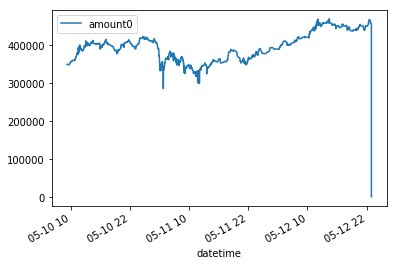

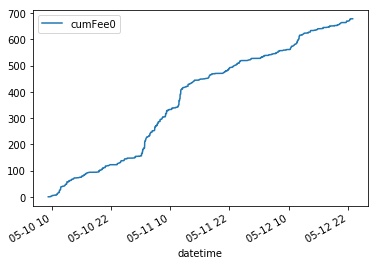

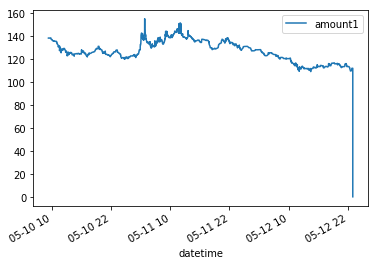

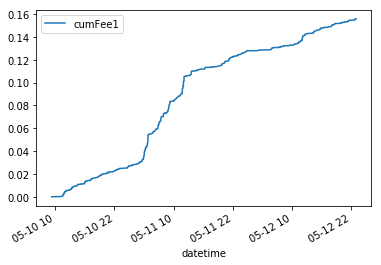

In [339]:
report.positions[1].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-07-25 22:57:11,360687.236003,0.000000,0.000000,0.000000,265.508,0.000000,0.000000,0.000000
1,2021-07-25 23:00:34,360867.366925,0.090065,0.090065,0.090065,265.423,0.000000,0.000000,0.000000
2,2021-07-25 23:00:41,360976.280743,0.054456,0.144521,0.144521,265.371,0.000000,0.000000,0.000000
3,2021-07-25 23:00:41,361881.387198,0.452553,0.597074,0.597074,264.943,0.000000,0.000000,0.000000
4,2021-07-25 23:01:22,362288.797900,0.203705,0.800779,0.800779,264.751,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
23359,2021-09-01 08:47:18,947395.938382,0.000000,3202.088126,3202.088126,47.299,0.000003,1.008704,1.008704
23360,2021-09-01 08:48:00,946669.256253,0.000000,3202.088126,3202.088126,47.5116,0.000106,1.008810,1.008810
23361,2021-09-01 08:48:36,946454.062008,0.000000,3202.088126,3202.088126,47.5746,0.000031,1.008842,1.008842
23362,2021-09-01 08:49:15,944704.716127,0.000000,3202.088126,3202.088126,48.0871,0.000256,1.009098,1.009098


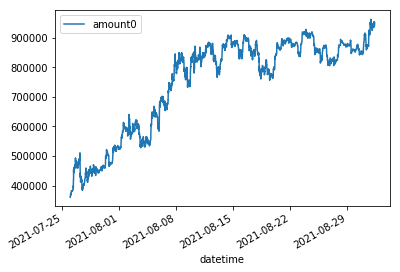

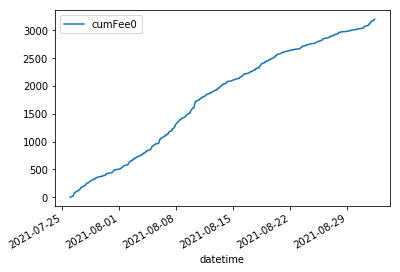

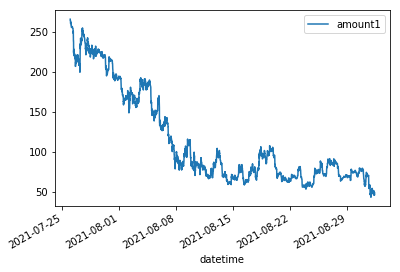

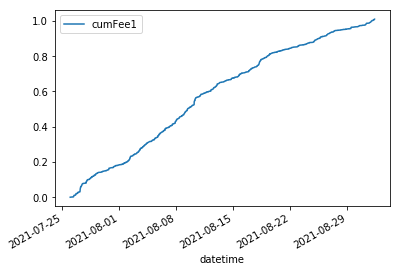

In [340]:
report.positions[2].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-07-25 22:57:11,360687.236003,0.000000,0.000000,0.000000,265.508,0.000000,0.000000,0.000000
1,2021-07-25 23:00:34,360867.366925,0.090065,0.090065,0.090065,265.423,0.000000,0.000000,0.000000
2,2021-07-25 23:00:41,360976.280743,0.054456,0.144521,0.144521,265.371,0.000000,0.000000,0.000000
3,2021-07-25 23:00:41,361881.387198,0.452553,0.597074,0.597074,264.943,0.000000,0.000000,0.000000
4,2021-07-25 23:01:22,362288.797900,0.203705,0.800779,0.800779,264.751,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
23359,2021-09-01 08:47:18,947395.938382,0.000000,3202.088126,3202.088126,47.299,0.000003,1.008704,1.008704
23360,2021-09-01 08:48:00,946669.256253,0.000000,3202.088126,3202.088126,47.5116,0.000106,1.008810,1.008810
23361,2021-09-01 08:48:36,946454.062008,0.000000,3202.088126,3202.088126,47.5746,0.000031,1.008842,1.008842
23362,2021-09-01 08:49:15,944704.716127,0.000000,3202.088126,3202.088126,48.0871,0.000256,1.009098,1.009098


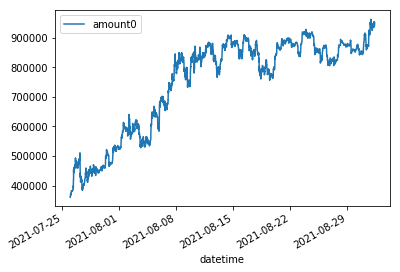

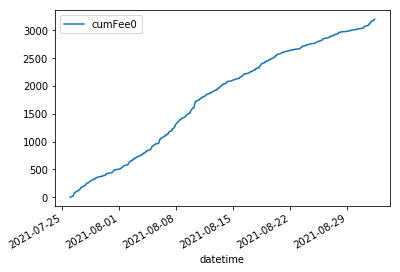

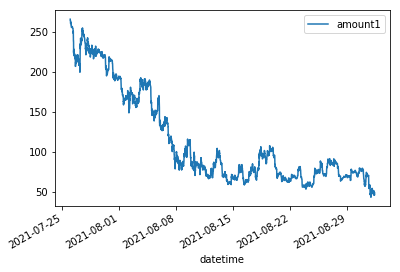

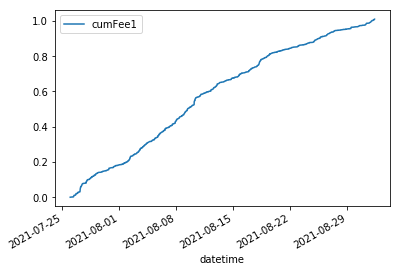

In [341]:
report.positions[2].get_balance(plain=True, draw_plot=True)

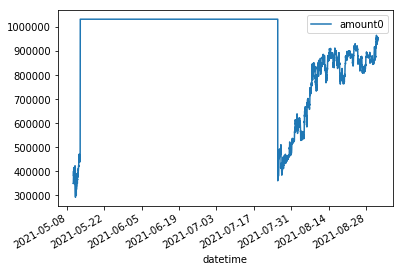

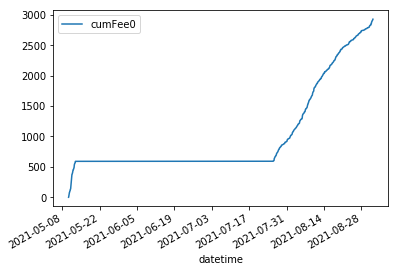

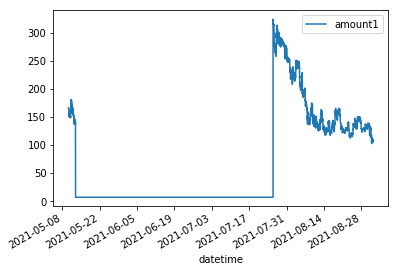

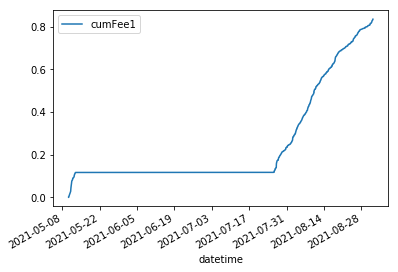

In [342]:
total_balance = report.total_balance(draw_plot=True, plain=True)

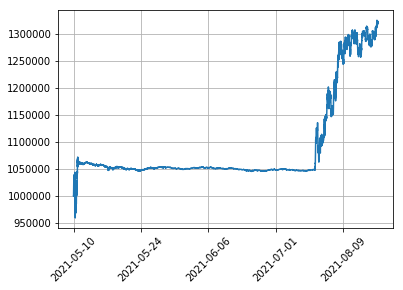

In [343]:
price = pricedata.drop_duplicates("timestamp").set_index("timestamp")["price"]
price
usdc_balance = total_balance.set_index("timestamp")[["amount0", "cumFee0"]].sum(axis=1)
eth_balance = total_balance.set_index("timestamp")[["amount1", "cumFee1"]].sum(axis=1) / price
eth_balance+usdc_balance
# eth_balance.plot()
# usdt_balance.plot()
tb_Timing = (eth_balance+usdc_balance)
time_to_print = list(map(time.localtime,tb_Timing.index.tolist()))
# time_to_print_2  = [time.strftime('%Y-%m-%d %H:%M:%S', i) for i in time_to_print]
time_to_print_2  = [time.strftime('%Y-%m-%d', i) for i in time_to_print]
tb_Timing.index = time_to_print_2
tb_Timing.plot(rot = 45,grid=True)
# tb_Timing.to_csv('../data/tb_timing.csv')

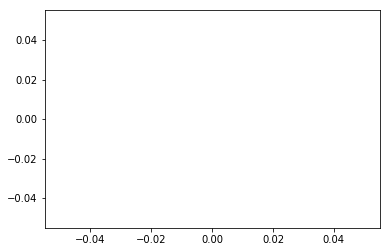

In [344]:
assets_value = (total_balance["amount1"] / 10**decimal1)/pricedata.set_index("timestamp")["price"] + total_balance["amount0"] / 10**decimal0
assets_value.plot()
# pricedata.set_index("timestamp")[["price"]].plot()

In [345]:
assets_value

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
             ... 
1630457280    NaN
1630457316    NaN
1630457355    NaN
1630457391    NaN
1630457391    NaN
Length: 210642, dtype: object